## Import Libraries

In [63]:
import pandas as pd
import numpy as np
import sklearn
import re
import nltk
import wordcloud
import warnings
warnings.filterwarnings("ignore")

### Import Data

In [3]:
data = pd.read_excel("selected_songs.xlsx")
data

,genre,lyrics,Artist,Song
0,prog,"I am just a new boy,\nStranger in this town.,\...",Pink Floyd,Young Lust Lyrics
1,prog,"Eins, zwei, drei, alle!,Ooooh You cannot reach...",Pink Floyd,Waiting For The Worms Lyrics
2,prog,"All alone, or in twos,\nThe ones who really lo...",Pink Floyd,Outside The Wall Lyrics
3,prog,"Into the distance a ribbon of black,\nStretche...",Pink Floyd,Learning To Fly Lyrics
4,prog,"You got to be crazy, gotta have a real need,\n...",Pink Floyd,Dogs Lyrics
...,...,...,...,...
825,pop,"I Don't Know,\nThat You Want To Try,\nEvertime...",Michael Jackson,Remember The Time Lyrics
826,pop,"Girl, close your eyes,\nLet that rhythm get in...",Michael Jackson,Rock With You Lyrics
827,pop,"Help,\nI have done it again,\nI have been here...",Sia,Breathe Me Lyrics
828,pop,"Yeah, Rihanna,Good Girl Gone Bad,\nTake three,...",Rihanna,Umbrella Lyrics


##  Data Preprocessing

###  Removing Numbers, Punctuations and Lower the Words

In [64]:
def rid_of_specials(words):
    new= ''
    for i in range(len(words)):
        a = re.sub('[^A-Za-z]+', ' ', words[i]).lower()
        new += a
    return new

In [10]:
data['lyrics'] =  [rid_of_specials(i) for i in data["lyrics"]]

I passed the lyrics of every song in our dataframe to the user-defined *rid_of_specials* function and store the returned ones using list comprehesion. The function check every word for non-letter characters using the *sub* method from the *regex* module, then we apply the *lower* method for uniformity.

###  Tokenize

In [12]:
from nltk.tokenize import word_tokenize
tokenized=[word_tokenize(i) for i in data['lyrics']]

###  Removing Stopwords

In [13]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stopped = [[i for i in j if i not in stop_words] for j in tokenized]

I imported  *stopwords* from the *nltk.corpus* module, then import the English ones into a variable in the form of a set. Stopwords are commonly used words which are of importance to the respective sentence they're in.

###  Lemmatization

In [14]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized = [[lemmatizer.lemmatize(i) for i in j] for j in stopped]
prepeared_sentence= [' '.join(j) for j in lemmatized]
data['Lyrics_Processed'] = prepeared_sentence

In [15]:
data

,genre,lyrics,Artist,Song,Lyrics_Processed
0,prog,i am just a new boy stranger in this town w...,Pink Floyd,Young Lust Lyrics,new boy stranger town good time gon na show st...
1,prog,eins zwei drei alle ooooh you cannot reach...,Pink Floyd,Waiting For The Worms Lyrics,eins zwei drei alle ooooh reach ooooh matter t...
2,prog,all alone or in twos the ones who really lov...,Pink Floyd,Outside The Wall Lyrics,alone two one really love walk outside wall ha...
3,prog,into the distance a ribbon of black stretched...,Pink Floyd,Learning To Fly Lyrics,distance ribbon black stretched point turning ...
4,prog,you got to be crazy gotta have a real need g...,Pink Floyd,Dogs Lyrics,got crazy got ta real need got sleep toe stree...
...,...,...,...,...,...
825,pop,i don t know that you want to try evertime y...,Michael Jackson,Remember The Time Lyrics,know want try evertime see remember fell love ...
826,pop,girl close your eyes let that rhythm get int...,Michael Jackson,Rock With You Lyrics,girl close eye let rhythm get try fight nothin...
827,pop,help i have done it again i have been here m...,Sia,Breathe Me Lyrics,help done many time hurt today worst part one ...
828,pop,yeah rihanna good girl gone bad take three ...,Rihanna,Umbrella Lyrics,yeah rihanna good girl gone bad take three act...


I grouped together inflected forms of all the lyrics into one using the *WordNetLemmatizer* provided by *nltk.stem*. The *Lyrics_Processed* column will help us in the next task where we will vectorize the lyrics.

Lemmatization is a form of processing in linguistics where inflected forms of a word are grouped under their raw form.

One other method to use for grouping inflected forms of a word under their more primitive forms is **stemming**. Stemming differs from lemmatization in the way that when a word is processed under it only the attached part is dropped e.g. having -> hav whereas if it was processed using lemmatization it would've been having -> have.

###  Vectorization

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(prepeared_sentence)
feature_names = vectorizer.get_feature_names()
lyrics_vectorized = pd.DataFrame(X.toarray(), columns = feature_names)

In the first step, I assigned the CountVectorizer() function, which we imported from the sklearn library, to the vectorizer variable. In step 2, I vectorized the previously edited sentences with vectorizer.fit_transform(). In step 3, assigned the name of the vector variables to featue_names with get_feature_names(). In step 4, converted the vectors to Dataframe with their names.

Countvectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This way we can process texts in machine learning models

In CountVectorizer we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. This ends up in ignoring rare words which could have helped is in processing our data more efficiently .we can use TF-IDF to avoid this. TF-IDF Vectorization consists of 2 parts, TF (Term Frequency) multiplied with IDF (Inverse Document Frequency).We penalize common words while identifying important words in this manner.

###  Target Preperation

In [17]:
data.genre

0      prog
1      prog
2      prog
3      prog
4      prog
       ... 
825     pop
826     pop
827     pop
828     pop
829     pop
Name: genre, Length: 830, dtype: object

In [20]:


from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  

from sklearn.preprocessing import OneHotEncoder
from numpy import array

onehot_encoder = OneHotEncoder(sparse= False , drop = "first")

genre = array(data.genre)
genre = genre.reshape(len(genre), 1)
onehot_encode_genre = pd.DataFrame(onehot_encoder.fit_transform(genre))

onehot_encode_genre


,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
825,0.0
826,0.0
827,0.0
828,0.0


##  Exploratory Data Analysis 

<AxesSubplot:>

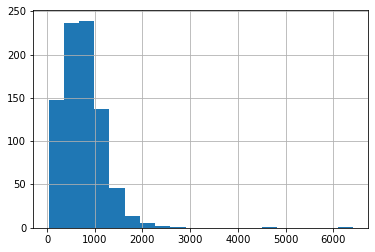

In [21]:
lp = data['Lyrics_Processed']
lp.str.len().hist(bins=20)

Distribution of number of letters in lyrics post-processed seems to be distributed somewhat similar to Gamma Dist. with a mean that is slightly smaller than 600 letters.

<AxesSubplot:>

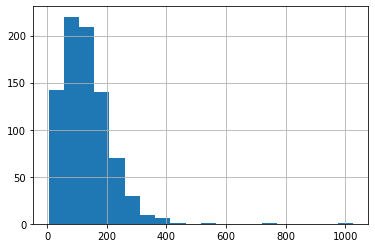

In [22]:
lp.str.split().map(lambda x: len(x)).hist(bins=20)

The case with the number of words in respective lyrics is quite similar. The histogram resembles a Gamma Dist. with a mean that is slightly less than 100. (1 word ~= 6 letters might be another takeaway from this analysis)

<AxesSubplot:>

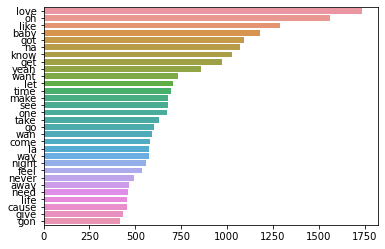

In [23]:
from collections import Counter
import seaborn as sns

stopped_flat = [word for lyrics in stopped for word in lyrics]

counter = Counter(stopped_flat)
most = counter.most_common()

x = [i[1] for i in most]
y = [i[0] for i in most]

x = x[:30]
y = y[:30]

sns.barplot(x=x, y=y)

As it can be seen from the bar chart there is a theme of love in the songs we are inspecting (Love is in the air?). To get a better feel for the context we can look at how frequently some words are used in conjunction with others. This is called ngram exploration. However the context seems to be trivial in this case so there is no need for further exploration.

In [24]:
import gensim
corp = [s.split() for s in prepeared_sentence]
dic = gensim.corpora.Dictionary(corp)
bc = [dic.doc2bow(doc) for doc in corp]

In [25]:
lda_model = gensim.models.LdaMulticore(bc, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.023*"oh" + 0.019*"la" + 0.017*"love" + 0.016*"want" + 0.011*"make" + 0.011*"got" + 0.011*"know" + 0.010*"get" + 0.010*"like" + 0.009*"go"'),
 (1,
  '0.023*"love" + 0.017*"night" + 0.009*"oh" + 0.007*"way" + 0.007*"run" + 0.007*"never" + 0.006*"know" + 0.006*"day" + 0.006*"like" + 0.006*"time"'),
 (2,
  '0.027*"na" + 0.025*"baby" + 0.018*"like" + 0.016*"love" + 0.015*"know" + 0.013*"wan" + 0.013*"got" + 0.011*"oh" + 0.011*"get" + 0.011*"gon"'),
 (3,
  '0.011*"yeah" + 0.011*"love" + 0.009*"like" + 0.009*"oh" + 0.009*"got" + 0.009*"get" + 0.009*"time" + 0.007*"see" + 0.007*"one" + 0.007*"away"')]

In [26]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bc, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.037101 -0.018927       1        1  33.841947
0     -0.037199 -0.083647       2        1  26.025292
2     -0.102632  0.063044       3        1  24.984540
1      0.102729  0.039531       4        1  15.148220, topic_info=        Term         Freq        Total Category  logprob  loglift
3352      la   527.000000   527.000000  Default  30.0000  30.0000
14        na  1022.000000  1022.000000  Default  29.0000  29.0000
190    night   527.000000   527.000000  Default  28.0000  28.0000
2511    baby  1119.000000  1119.000000  Default  27.0000  27.0000
5970  phresh   197.000000   197.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
495     hold    53.644560   236.677602   Topic4  -5.7254   0.4030
139    heart    57.952696   375.188180   Topic4  -5.6482   0.0195
280   little    51.144739   212.766490   Topic4  -5.7731   0.4618
151     back    53.676249   304.371214   Topic4  -5.7248   0.1520
2511    baby    56.001499  1119.257687   Topic4  -5.6824  -1.1078

[335 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
7860      2  0.963953  aaaaaaaaah
7076      2  0.951745        aahh
2308      1  0.076722          ah
2308      2  0.726604          ah
2308      3  0.176010          ah
...     ...       ...         ...
332       4  0.028277        yeah
434       1  0.209255         yes
434       2  0.595573         yes
434       3  0.120724         yes
434       4  0.064386         yes

[624 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

The common love theme continues even after using *gensim* to compute commonly shared topics inside the lyrics and visualize LDA with *pyLDAvis*.

##  Feature Creation & Selection

#### Artist Names

I wanted to include artists in the model, as I think they would also be effective in predicting song genre. For this, I applied one hot encoder conversion to artist names. I used the drop = "first" property to get rid of the dummy variable trap.

In [36]:
from sklearn.preprocessing import OneHotEncoder
from numpy import array

onehot_encoder = OneHotEncoder(sparse= False , drop = "first")

artists = array(data.Artist)
artists = artists.reshape(len(artists), 1)
onehot_encode_artists = pd.DataFrame(onehot_encoder.fit_transform(artists))

#### Song Names

I thought that song names were as important as the lyrics in determining the genre.  I edited and vectorized the song names with the same processes. I did not include "Lyrics" in the vectorization because all of the song titles contain "Lyrics."

In [37]:
data['Song'] = [rid_of_specials(i) for i in data["Song"]] 
tokenized_song=[word_tokenize(i) for i in data['Song']]
stopped_song = [[i for i in j if ((i not in stop_words)&(i !="lyrics"))] for j in tokenized_song]

lemmatized_song = [[lemmatizer.lemmatize(i) for i in j] for j in stopped_song]
prepeared_sentence_song= [' '.join(j) for j in lemmatized_song]
data['Song_Processed'] = prepeared_sentence_song

In [38]:
X_song = vectorizer.fit_transform(prepeared_sentence_song)
feature_names_song = vectorizer.get_feature_names()
song_vectorized = pd.DataFrame(X_song.toarray(), columns = feature_names_song)

###  Select or eliminate redundant features.

In this study, I vectorized the lyrics to get them into the algorithms, but in this case I had to create a new column for each word. In our dataset, this resulted in 8000 columns. For a more performing model, I can eliminate these columns without losing their meaning. For this, I selected the first 500 words from the words sorted by word frequency with the max_features parameter of the CountVectorizer(). Thus, I was able to create our model with 500 columns instead of 8000 columns.

In [39]:
vectorizer = CountVectorizer(max_features= 500)
X = vectorizer.fit_transform(prepeared_sentence)
feature_names = vectorizer.get_feature_names()
lyrics_vectorized = pd.DataFrame(X.toarray(), columns = feature_names)

I merged the data into a single dataframe using the *concat* method.

In [40]:
all_features = pd.concat([lyrics_vectorized,song_vectorized,onehot_encode_artists],axis = 1)

In [41]:
all_features

,across,ah,air,alive,almost,alone,along,alright,always,america,...,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0,1,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,2,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
826,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
827,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
828,0,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##  Train - Test Splitting

In [43]:
from sklearn.model_selection import train_test_split

X = all_features
y = onehot_encode_genre
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

##  Modelling

####  Naive Bayes

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


nb = Pipeline([
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

yp_nb = nb.predict(X_test)

print('accuracy %s' % accuracy_score(yp_nb, y_test))
print(classification_report(y_test, yp_nb))

accuracy 0.8990384615384616
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       109
         1.0       0.87      0.93      0.90        99

    accuracy                           0.90       208
   macro avg       0.90      0.90      0.90       208
weighted avg       0.90      0.90      0.90       208



####  Decision Trees

In [45]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
yp_dtc = dtc.predict(X_test)
print('accuracy %s' % accuracy_score(yp_dtc, y_test))
print(classification_report(y_test, yp_dtc))

accuracy 0.9807692307692307
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       109
         1.0       0.98      0.98      0.98        99

    accuracy                           0.98       208
   macro avg       0.98      0.98      0.98       208
weighted avg       0.98      0.98      0.98       208



####  Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

yp_rfc = rfc.predict(X_test)
print('accuracy %s' % accuracy_score(yp_rfc, y_test))
print(classification_report(y_test, yp_rfc))

accuracy 0.9855769230769231
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       109
         1.0       0.99      0.98      0.98        99

    accuracy                           0.99       208
   macro avg       0.99      0.99      0.99       208
weighted avg       0.99      0.99      0.99       208



####  GBM

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(learning_rate=0.1)
gbm.fit(X_train,y_train)
yp_gbm = gbm.predict(X_test)
print('accuracy %s' % accuracy_score(yp_gbm, y_test))
print(classification_report(y_test, yp_gbm))

accuracy 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       109
         1.0       1.00      1.00      1.00        99

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208



###  Model Evaluation

Even though we displayed the F1 Score and the Accuracy Score for the models while tuning it might be healthier to calculate them using the respective methods from the *sklearn.metrics* module. Better readibility in terms of comparison was another reason why we coded this section in addition.

In [48]:
import sklearn.metrics as metrics

In [49]:
fs = []
for y_pred in [yp_nb, yp_dtc, yp_rfc, yp_gbm]:
    fs.append(metrics.f1_score(y_test, y_pred, average='weighted'))

In [50]:
for f, m in zip(fs, ['Naive Bayes', 'Decision Trees', 'Random Forest', 'Gradient Booster']):
    print('F1 Score for', m, 'is', f)

F1 Score for Naive Bayes is 0.8990874776593191
F1 Score for Decision Trees is 0.9807692307692307
F1 Score for Random Forest is 0.9855732456820697
F1 Score for Gradient Booster is 1.0


In [51]:
acs = []
for y_pred in [yp_nb, yp_dtc, yp_rfc, yp_gbm]:
    acs.append(metrics.accuracy_score(y_test, y_pred, normalize=True))

In [52]:
for a, m in zip(acs, ['Naive Bayes', 'Decision Trees', 'Random Forest', 'Gradient Booster']):
    print('Accuracy Score for', m, 'is', a)

Accuracy Score for Naive Bayes is 0.8990384615384616
Accuracy Score for Decision Trees is 0.9807692307692307
Accuracy Score for Random Forest is 0.9855769230769231
Accuracy Score for Gradient Booster is 1.0


In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

#### Confusion Matrix for Naive Bayes

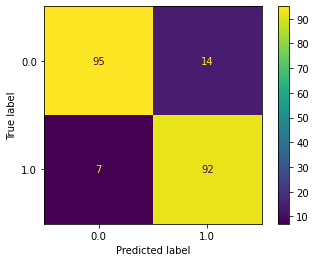

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, yp_nb)

#### Confusion Matrix for Decision Trees

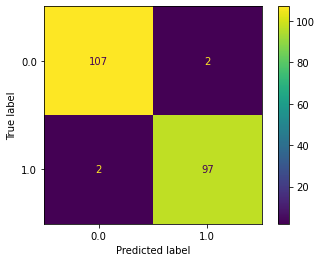

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, yp_dtc)

#### Confusion Matrix for Random Forest

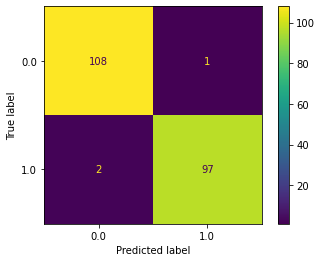

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, yp_rfc)

#### Confusion Matrix for Gradient Booster

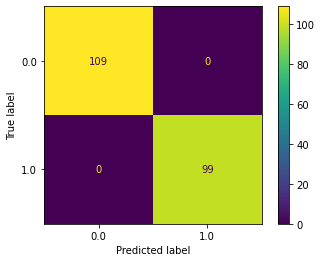

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test, yp_gbm)

In [58]:
from sklearn.metrics import RocCurveDisplay

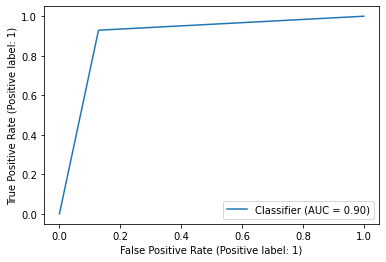

In [59]:
RocCurveDisplay.from_predictions(y_test, yp_nb)

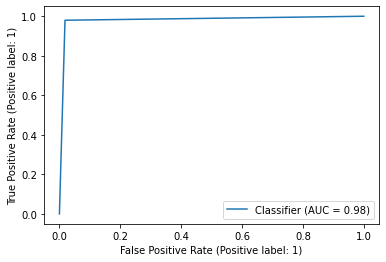

In [60]:
RocCurveDisplay.from_predictions(y_test, yp_dtc)

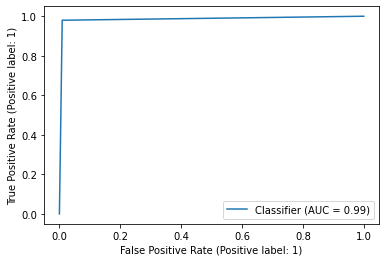

In [61]:
RocCurveDisplay.from_predictions(y_test, yp_rfc)

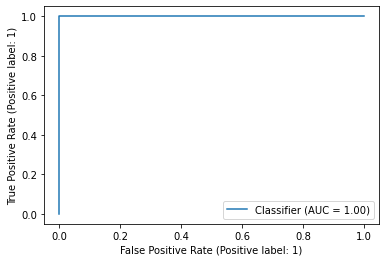

In [62]:
RocCurveDisplay.from_predictions(y_test, yp_gbm)

After looking at the computed statistics:
- F-scores
- Accuracy scores
- Confusion Matrices
- ROC Curves and AOC

It is safe to assume all our models did a stellar job at classifying our data where Naive Bayes was the worst with an F1-Score of 0.91 which can still be considered really high. Accuracy scores were highly in line with the F-scores so provided no additional insight as to which model is better. 

As for the confusion matrices Naive Bayes had 12 FP's and 7 FN's out of the test data. Followed by Decision Trees where FP and FN were 3 each. Random Forest performed slightly better where it only had 1 FP and 3 FN. 

Our Gradient Booster Classifier really took the cake with all correct labels for the test data. F-Score and Acc. Score were both 1 as you could've guessed. It was quite magical to see this model correctly predict the genre for each row.